In [124]:
import numpy as np
import scipy.optimize as optimize
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import warnings
import pandas as pd
import networkx as nx
import random
from collections import deque

style.use("seaborn-white")
plt.rc("figure", figsize=(20, 10))
plt.rc("font", size=20)
plt.rc("legend", fontsize=20)
warnings.filterwarnings("ignore")

In [53]:
# graph representation methods
def get_adj_matrix(v=100, e=200):
    adj_matrix = np.zeros((v, v))
    k = 0
    while k < e:
        i, j = random.randint(0, v - 1), random.randint(0, v - 1)
        if adj_matrix[i, j] == 0 and i != j:
            adj_matrix[i, j] = 1
            adj_matrix[j, i] = 1
            k += 1
    return adj_matrix

def get_adj_list_from_graph(graph):
    return {i[0]: list(i[1].keys()) for i in graph.adjacency()}

In [166]:
adj_matrix = get_adj_matrix()
g = nx.from_numpy_matrix(get_adj_matrix())
adj_list = get_adj_list_from_graph(g)

In [221]:
adj_matrix[:1]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [222]:
adj_list

{0: [22, 58, 83],
 1: [19, 54],
 2: [31, 42, 70, 88],
 3: [5, 34],
 4: [7, 8, 20, 29, 30, 42, 48, 56, 78],
 5: [3, 22, 54, 67, 70],
 6: [16, 51, 72, 81],
 7: [4, 82],
 8: [4, 13, 21],
 9: [25, 59, 66, 76, 95, 97],
 10: [19, 24, 33, 51, 76, 82, 90],
 11: [],
 12: [27, 28, 36, 58, 74],
 13: [8, 18, 29],
 14: [70],
 15: [22, 33, 34, 52, 62, 69, 79],
 16: [6, 33, 72, 84],
 17: [22, 29, 51, 57, 81, 96],
 18: [13, 21, 23, 85],
 19: [1, 10, 56, 66, 86],
 20: [4, 25, 29, 36, 85, 88],
 21: [8, 18, 33, 38, 42, 73],
 22: [0, 5, 15, 17, 52],
 23: [18, 49, 53, 57, 97],
 24: [10, 46],
 25: [9, 20, 29, 40, 59, 74],
 26: [67],
 27: [12, 39, 47, 71],
 28: [12, 39, 53],
 29: [4, 13, 17, 20, 25, 32, 44, 49, 53, 61, 68, 76],
 30: [4, 42, 62, 80],
 31: [2, 43, 54],
 32: [29, 38, 50, 66, 75, 76],
 33: [10, 15, 16, 21, 42, 69, 92],
 34: [3, 15, 56, 78, 88],
 35: [48],
 36: [12, 20, 47, 74],
 37: [45, 75, 96],
 38: [21, 32, 42],
 39: [27, 28, 68, 79],
 40: [25, 62],
 41: [],
 42: [2, 4, 21, 30, 33, 38, 63],
 

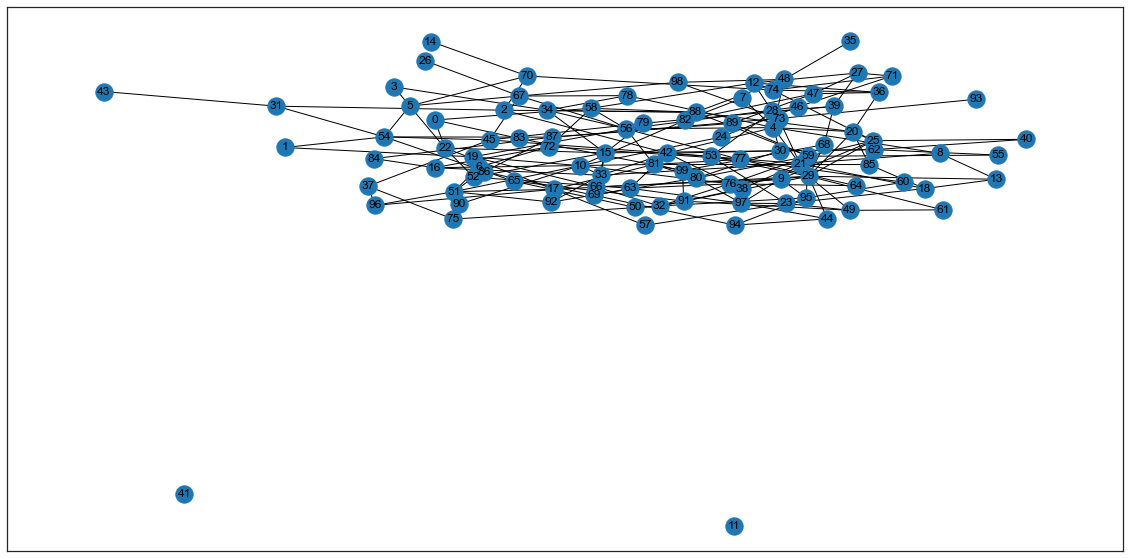

In [220]:
nx.draw_networkx(g, with_labels=True)

In [122]:
def find_components(adj_list):
    def dfs(visited, adj_list, node):
        if node not in visited:
            visited.append(node)
            for neighbor in adj_list[node]:
                dfs(visited, adj_list, neighbor)
    
    adj_list = dict(adj_list)
    components = {}
    visited = list()
    i = 0
    while len(visited) != len(adj_list):
        node = random.choice(list(set(adj_list.keys()).difference(set(visited))))
        dfs(visited, adj_list, node)
        components[i] = visited
        for v in visited:
            del adj_list[v]
        visited = list()
        i += 1
    return components

def shortest_path(a, b, adj_list):
    if a == b:
        return [a]
    visited = [a]
    queue = deque([(a, [])])
    while queue:
        node, path = queue.popleft()
        for neighbor in adj_list[node]:
            if neighbor == b:
                return path + [node] + [b]
            if neighbor not in visited:
                visited.append(neighbor)
                queue.append((neighbor, path + [node]))
    return 'No path between these vertices'        

In [223]:
a, b = 10, 3
shortest_path(a, b, adj_list)

[10, 19, 56, 34, 3]

In [224]:
nx.shortest_path(g, a, b)

[10, 19, 56, 34, 3]

In [225]:
find_components(adj_list)

{0: [22,
  0,
  58,
  12,
  27,
  39,
  28,
  53,
  23,
  18,
  13,
  8,
  4,
  7,
  82,
  10,
  19,
  1,
  54,
  5,
  3,
  34,
  15,
  33,
  16,
  6,
  51,
  17,
  29,
  20,
  25,
  9,
  59,
  55,
  62,
  30,
  42,
  2,
  31,
  43,
  70,
  14,
  74,
  36,
  47,
  89,
  87,
  73,
  21,
  38,
  32,
  50,
  65,
  91,
  49,
  61,
  99,
  68,
  80,
  81,
  56,
  46,
  24,
  71,
  67,
  26,
  45,
  37,
  75,
  96,
  79,
  78,
  98,
  48,
  35,
  88,
  77,
  60,
  95,
  94,
  44,
  97,
  63,
  52,
  69,
  86,
  76,
  64,
  72,
  85,
  92,
  83,
  66,
  93,
  84,
  40,
  57,
  90],
 1: [41],
 2: [11]}

In [226]:
[i for i in nx.components.connected_components(g)]

[{0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99},
 {11},
 {41}]